In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

(700,)


<function matplotlib.pyplot.show(close=None, block=None)>

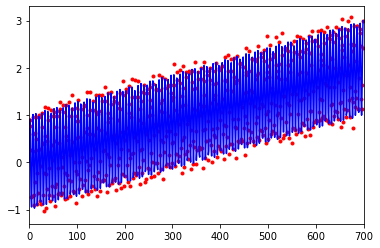

In [4]:
data_time = np.sin(np.arange(700)) + np.random.normal(0, 0.1, 700) + np.arange(700)/350
print(data_time.shape)
plt.plot(data_time, 'r.')
plt.plot(range(700), np.sin(np.arange(700)) + np.arange(700)/350 , 'b')
plt.xlim(-0.5, 700.5)
plt.ylim(-1.3, 3.3)
plt.show

In [6]:
data_matrix =[]
seq_len = 3
for i in range(0,len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(697, 4)
[[ 0.08849348  0.76682546  0.90056991  0.2628719 ]
 [ 0.76682546  0.90056991  0.2628719  -0.74021573]
 [ 0.90056991  0.2628719  -0.74021573 -0.70280046]
 ...
 [ 2.46484329  1.33385302  1.13297553  1.64568847]
 [ 1.33385302  1.13297553  1.64568847  2.42333845]
 [ 1.13297553  1.64568847  2.42333845  2.98584085]]


In [7]:
datax = data_matrix_np[:, 0:3]
datay = data_matrix_np[:,3]
print(datax.shape)
print(datay.shape)

(697, 3)
(697,)


In [9]:
trnx = datax[0:500, :]
trny = datay[0:500]
tstx = datax[500:datax.shape[0], :]
tsty = datay[500:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(500, 3)
(197, 3)
(500,)
(197,)


In [10]:
input_shape = (3,)
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units= 10, activation='relu', input_shape = input_shape))
mlp_model.add(layers.Dense(units= 20, activation='relu'))
mlp_model.add(layers.Dense(units= 1, activation='linear'))

mlp_model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [11]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 200)

_squared_error: 0.0399 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 83/200
500/500 [==============================] - 0s 136us/sample - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1656 - val_mean_squared_error: 0.1656
Epoch 84/200
500/500 [==============================] - 0s 142us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1446 - val_mean_squared_error: 0.1446
Epoch 85/200
500/500 [==============================] - 0s 156us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.1419 - val_mean_squared_error: 0.1419
Epoch 86/200
500/500 [==============================] - 0s 164us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.1506 - val_mean_squared_error: 0.1506
Epoch 87/200
500/500 [==============================] - 0s 156us/sample - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.1448 - val_mean_squared_error: 0.1448
Epoch 88/200
500/500 [==============================] - 0s 154us/sample - loss: 0.039

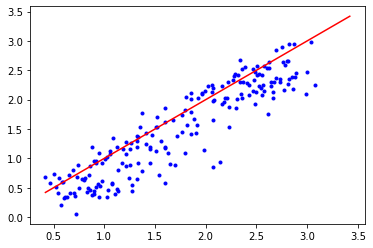

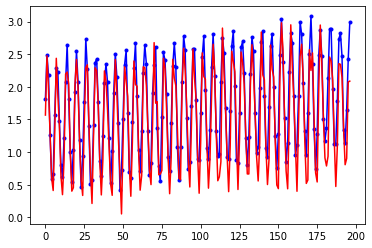

Final validation error is: 0.146093


In [15]:
plt.plot(tsty, mlp_model.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty), max(tsty) + 0.5), np.arange(min(tsty), max(tsty) + 0.5), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), mlp_model.predict(tstx), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len( history.history['val_mean_squared_error'] )-1].astype(float))

In [26]:
batch_size = 10
sequence_length = 4
data_dim = 3

In [27]:
datax = data_matrix_np[0: data_matrix_np.shape[0]-1, 0:3]
datay = data_matrix_np[0: data_matrix_np.shape[0]-1: , 3]
print(datax.shape)
print(datay.shape)

(696, 3)
(696,)


In [28]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)

(174, 4, 3)
(174, 4, 1)


In [30]:
trnx = datax[0:120, :]
trny = datay[0:120]
tstx = datax[120:datax.shape[0], :]
tsty = datay[120:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(120, 4, 3)
(54, 4, 3)
(120, 4, 1)
(54, 4, 1)


In [31]:
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [32]:
rnn_layer = layers.LSTM(15, return_sequences= True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1, activation='relu'))(rnn_layer)

In [33]:
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [34]:
model_mtom.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 3)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 4, 15)             1140      
_________________________________________________________________
time_distributed (TimeDistri (None, 4, 1)              16        
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model_mtom.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 200)

_squared_error: 0.0967 - val_loss: 0.1936 - val_mean_squared_error: 0.1936
Epoch 83/200
120/120 [==============================] - 0s 515us/sample - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 84/200
120/120 [==============================] - 0s 349us/sample - loss: 0.0961 - mean_squared_error: 0.0961 - val_loss: 0.1996 - val_mean_squared_error: 0.1996
Epoch 85/200
120/120 [==============================] - 0s 332us/sample - loss: 0.0959 - mean_squared_error: 0.0959 - val_loss: 0.1916 - val_mean_squared_error: 0.1916
Epoch 86/200
120/120 [==============================] - 0s 366us/sample - loss: 0.0958 - mean_squared_error: 0.0958 - val_loss: 0.1938 - val_mean_squared_error: 0.1938
Epoch 87/200
120/120 [==============================] - 0s 366us/sample - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.1928 - val_mean_squared_error: 0.1928
Epoch 88/200
120/120 [==============================] - 0s 341us/sample - loss: 0.095

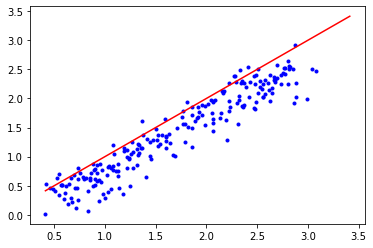

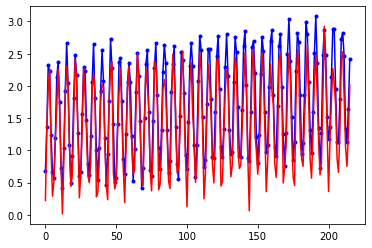

Final validation error is: 0.134234


In [36]:
tmp = np.reshape( tsty, (-1,1) )

plt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)), 'b.')
plt.plot(np.arange(min(tmp), max(tmp)+ 0.5), np.arange(min(tmp), max(tmp)+ 0.5), 'r')
plt.show()

plt.plot(range(tmp.shape[0]), tmp, 'b.-')
plt.plot(range(tmp.shape[0]), np.reshape(model_mtom.predict(tstx), (-1,1)), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len( history.history['val_mean_squared_error'] )-1].astype(float))

In [37]:
data_time.shape

(700,)

In [38]:
data_matrix =[]
seq_len = 3
for i in range(0, len(data_time)- data_dim*sequence_length):
    tmp_data = data_time[i : i +data_dim*sequence_length +1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(688, 13)
[[ 0.08849348  0.76682546  0.90056991 ... -0.68327641 -0.90627179
  -0.41305542]
 [ 0.76682546  0.90056991  0.2628719  ... -0.90627179 -0.41305542
   0.62113057]
 [ 0.90056991  0.2628719  -0.74021573 ... -0.41305542  0.62113057
   0.96748168]
 ...
 [ 2.14193616  2.88534687  2.87977629 ...  1.33385302  1.13297553
   1.64568847]
 [ 2.88534687  2.87977629  1.95946398 ...  1.13297553  1.64568847
   2.42333845]
 [ 2.87977629  1.95946398  1.12455622 ...  1.64568847  2.42333845
   2.98584085]]


In [39]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1 : ,12]
print(datax.shape)
print(datay.shape)

(687, 12)
(687,)


In [40]:
datax = np.reshape(datax, (-1, sequence_length, data_dim))
print(datax.shape)
print(datay.shape)

(687, 4, 3)
(687,)


In [41]:
trnx = datax[0:600, :]
trny = datay[0:600]
tstx = datax[600:datax.shape[0], :]
tsty = datay[600:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(600, 4, 3)
(87, 4, 3)
(600,)
(87,)


In [42]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [43]:
rnn_layer = layers.LSTM(15)(input_tensor)
output_tensor = layers.Dense(1, activation='relu')(rnn_layer)

In [44]:
model_mtoo = models.Model(input_tensor, output_tensor)
model_mtoo.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error', 'accuracy'])

In [45]:
model_mtoo.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 3)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 15)                1140      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model_mtoo.fit(trnx, trny, validation_data = [tstx, tsty], batch_size = 10, epochs = 200)

ss: 0.0131 - val_mean_squared_error: 0.0131 - val_accuracy: 0.0000e+00
Epoch 110/200
600/600 [==============================] - 0s 248us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_mean_squared_error: 0.0166 - val_accuracy: 0.0000e+00
Epoch 111/200
600/600 [==============================] - 0s 256us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - accuracy: 0.0000e+00 - val_loss: 0.0172 - val_mean_squared_error: 0.0172 - val_accuracy: 0.0000e+00
Epoch 112/200
600/600 [==============================] - 0s 249us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_mean_squared_error: 0.0127 - val_accuracy: 0.0000e+00
Epoch 113/200
600/600 [==============================] - 0s 251us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - accuracy: 0.0000e+00 - val_loss: 0.0219 - val_mean_squared_error: 0.0219 - val_accuracy: 0.0000e+00
Epoch 114/200
600/600 [==============================

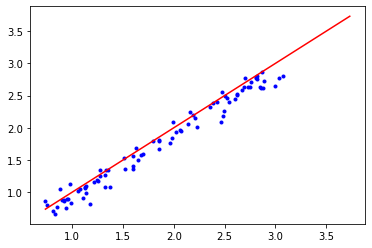

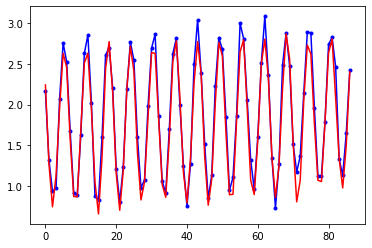

Final validation error is: 0.020864


In [48]:
plt.plot(tsty, model_mtoo.predict(tstx), 'b.')
plt.plot(np.arange(min(tsty), max(tsty) + 1), np.arange(min(tsty), max(tsty) + 1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]), tsty, 'b.-')
plt.plot(range(tsty.shape[0]), model_mtoo.predict(tstx), 'r-')
plt.show()
print("Final validation error is: %f" % history.history['val_mean_squared_error'][len( history.history['val_mean_squared_error'] )-1].astype(float))
